# workbook and code provied by Sian

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

# Task 1

In [6]:
# load the dataset that we will use to build a model that can predict the quality of batch of cookies
cookies = pd.read_csv('cookies.csv')
cookies

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,0.66,2.0,390,15.0,88.0,0.99357,8.66,0.60,11.5,6,cubed,11.6,7,peanut butter,1.36,3
5194,0.16,1.5,490,10.0,97.0,0.99170,8.48,0.44,10.7,8,melted,10.0,7,raisins,1.80,3
5195,0.25,14.3,480,79.0,149.0,0.99750,8.12,0.37,9.7,7,melted,13.4,7,"chocolate, oats",1.07,3
5196,0.33,1.4,560,35.0,136.0,0.99380,8.63,0.78,10.3,8,melted,13.8,7,chocolate,1.77,3


In [5]:
# dataset without the label of cookies quality - this is used to predict the label quality
cookies_val = pd.read_csv("cookies_validate.csv")
cookies_val

,id,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,14,0.62,19.25,400.0,41.0,172.0,1.00020,7.98,0.67,9.7,0,melted,16.6,7,"nuts, chocolate",1.85,3
1,26,0.35,1.00,520.0,35.0,146.0,0.99300,8.45,0.44,10.0,0,melted,13.8,7,chocolate,1.43,3
2,30,0.39,10.40,440.0,20.0,142.0,0.99740,8.20,0.53,10.0,0,melted,17.0,7,chocolate,1.57,3
3,52,0.33,1.10,570.0,21.0,82.0,0.99100,8.32,0.46,10.9,0,melted,12.4,7,"chocolate, oats",1.44,3
4,100,0.37,13.50,600.0,52.0,192.0,0.99750,8.00,0.44,9.1,0,melted,14.8,7,chocolate,1.51,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,1442,0.02,1.90,780.0,18.0,30.0,0.99712,8.40,0.75,9.8,0,cubed,13.8,7,"nuts, oats, chocolate",1.01,3
775,1445,0.19,5.20,940.0,19.0,98.0,0.99713,8.16,0.52,9.6,0,cubed,14.8,7,"nuts, oats",1.68,3
776,1461,0.00,2.10,600.0,6.0,13.0,0.99664,8.59,0.61,10.0,0,cubed,12.4,7,"nuts, oats",1.38,3
777,1467,0.08,2.30,670.0,19.0,32.0,0.99648,8.52,0.57,11.0,0,cubed,13.4,7,peanut butter,1.63,3


In [4]:
# dataset with the real quality label of the validate set. this data is used to calculate the accuracy of any model run
cookies_test = pd.read_csv("cookies_test.csv")
cookies_test

,id,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,14,0.62,19.25,400.0,41.0,172.0,1.00020,7.98,0.67,9.7,7,melted,16.6,7,"nuts, chocolate",1.85,3
1,26,0.35,1.00,520.0,35.0,146.0,0.99300,8.45,0.44,10.0,8,melted,13.8,7,chocolate,1.43,3
2,30,0.39,10.40,440.0,20.0,142.0,0.99740,8.20,0.53,10.0,8,melted,17.0,7,chocolate,1.57,3
3,52,0.33,1.10,570.0,21.0,82.0,0.99100,8.32,0.46,10.9,9,melted,12.4,7,"chocolate, oats",1.44,3
4,100,0.37,13.50,600.0,52.0,192.0,0.99750,8.00,0.44,9.1,7,melted,14.8,7,chocolate,1.51,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,1442,0.02,1.90,780.0,18.0,30.0,0.99712,8.40,0.75,9.8,5,cubed,13.8,7,"nuts, oats, chocolate",1.01,3
775,1445,0.19,5.20,940.0,19.0,98.0,0.99713,8.16,0.52,9.6,6,cubed,14.8,7,"nuts, oats",1.68,3
776,1461,0.00,2.10,600.0,6.0,13.0,0.99664,8.59,0.61,10.0,4,cubed,12.4,7,"nuts, oats",1.38,3
777,1467,0.08,2.30,670.0,19.0,32.0,0.99648,8.52,0.57,11.0,4,cubed,13.4,7,peanut butter,1.63,3


# Task 2

## EDA

In [8]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5198 non-null   float64
 1   sugar index           5193 non-null   float64
 2   bake temp             5198 non-null   int64  
 3   chill time            5198 non-null   float64
 4   calories              5198 non-null   float64
 5   density               5198 non-null   float64
 6   pH                    5198 non-null   float64
 7   grams baking soda     5198 non-null   float64
 8   bake time             5188 non-null   float64
 9   quality               5198 non-null   int64  
 10  butter type           5198 non-null   object 
 11  weight                5198 non-null   float64
 12  diameter              5198 non-null   int64  
 13  mixins                5196 non-null   object 
 14  crunch factor         5198 non-null   float64
 15  aesthetic appeal     

We have 14 features, and quality being the target.
Most features are numerical.
Only butter type and mixins are categorical.
We have a few null values.

### Bake time

In [10]:
# looking at the feature bake time more closely
cookies['bake time'].describe()
# e.g. the avg baking time is 10.49, interesting
# the standard deviation it not too high, they all bake quite similar

count    5188.000000
mean       10.494758
std         1.194584
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: bake time, dtype: float64

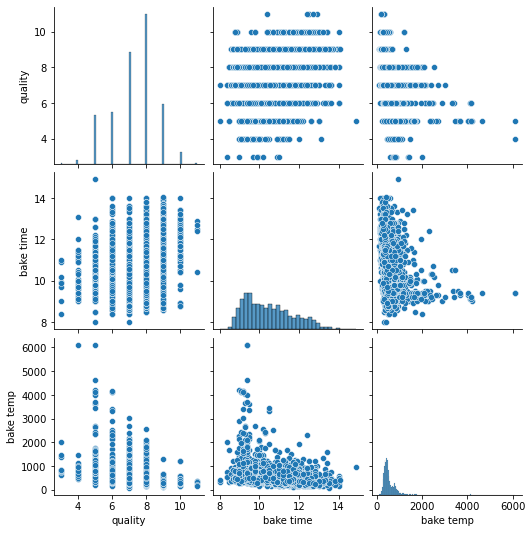

In [11]:
# looking at bake time, temp and quality against each other

sns.pairplot(cookies[['quality', 'bake time', 'bake temp']])

# if we assume quality 1 = lowest, 10 = highest
# you could suspect from first glance:
# the higher quality cookies are baked longer
# the higher quality cookies have a lower bake temp

# the shorter the bake time, the higher the temp

<ipython-input-12-25b709b497fa>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cookies.corr(), dtype=np.bool))


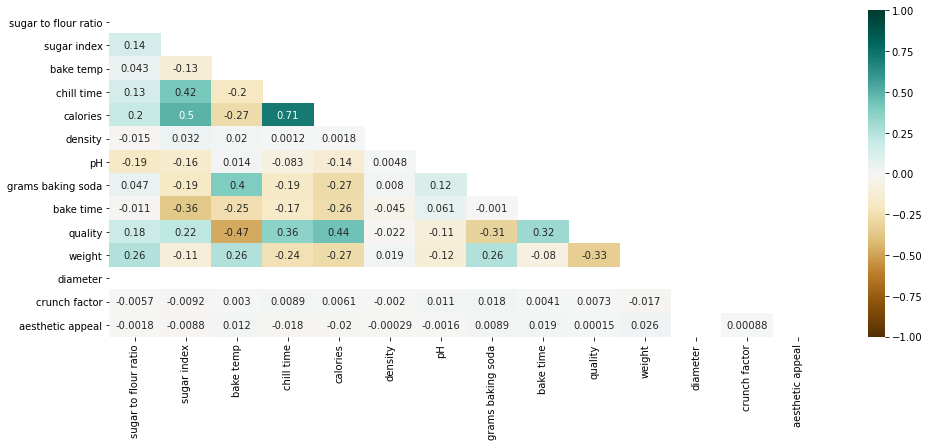

In [12]:
# looking at multicolunarity

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(cookies.corr(), dtype=np.bool))
heatmap = sns.heatmap(cookies.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# calories and sugar index - 0.5
# calories and chill time - 0.71
# calories and quality - 0.44
# chill time and sugar index - 0.42
# grams baking soda and bake temp - 0.4

# might remove calories as it has the highest value and is too close to the other high feature values

In [13]:
# looking at the correlcation of each feature against the target quality

num_cols = cookies.select_dtypes(include=["int64", "float64"]).columns

for column in num_cols:
    print(column, '-->', cookies['quality'].corr(cookies[column]))
    
# highest correlation is for:
# calories

sugar to flour ratio --> 0.18213460597745246
sugar index --> 0.22065352244335415
bake temp --> -0.4705037090124246
chill time --> 0.36465303504313296
calories --> 0.43983639874475894
density --> -0.02199530876237497
pH --> -0.11472101703648847
grams baking soda --> -0.3053403830897962
bake time --> 0.31530707105261097
quality --> 1.0
weight --> -0.3282994017266425
diameter --> nan
crunch factor --> 0.007262050440050112
aesthetic appeal --> 0.00015142266125480573


### butter

In [14]:
# checking the values in butter

cookies['butter type'].value_counts()

# only 2 types, melted or cubed

melted    3920
cubed     1278
Name: butter type, dtype: int64

### aesthetic appeal

In [15]:
# checking the values for aesthetic appeal

cookies['aesthetic appeal'].value_counts()

# there are only 2 different values
# they are not really giving us any information (what is the range?1-4?)
# it is sensible to drop the column

3    5195
4       3
Name: aesthetic appeal, dtype: int64

Thoughts on aesthetics : 
    not many values - drop column 

### weight

In [16]:
# we inspect the weight feature

cookies['weight'].describe()

# we see what could be an outlier: min = -99
# this must be an error, lets further investigate the values

count    5198.000000
mean       14.381935
std         3.023740
min       -99.000000
25%        12.800000
50%        14.000000
75%        15.400000
max        31.800000
Name: weight, dtype: float64

In [17]:
# looking at the unique values in weight to see if there are further outliers

cookies['weight'].unique()

# no, only th -99
# this one we shoud drop or replace with mean

array([ 15.2,  12.4,   9.4,  12.2,  19.8,  13.2,  14.2,  13.8,  12.6,
        12.8,  13. ,  14. ,  12. ,  14.6,  15.6,  13.4,  16.8,  14.8,
        13.6,  16. ,  11. ,  18.6,  10.6,  18.2,  15.8,  17.2,  14.3,
        10.4,  11.8,  11.6,  15.4,  21.6,  20.2,  14.4,  12.3,  23.8,
        11.2,  11.4,  15. ,  19.6,  17.4,  16.4,  19.2,  10.8,  18. ,
        26. ,  16.6,  16.2,  19. ,  10. ,  21.4,  20.4,  17. ,  31.2,
        17.8,  22.6,   9.8,  23. ,  18.8,  26.6,  20.8,  26.4,  10.2,
        22.2,  23.4,  18.4,  17.6,  28.4,  24.6,  20.6,  25. ,  24.2,
        22.8,  24. ,  23.2,  24.4,  26.8,  22.4,  19.4,  23.6,  27.4,
        28. ,  22. ,  21.8,  25.2,  25.8,  20. ,  21.2,  21. , -99. ,
        25.6,  31. ,   9. ,  24.8,  25.4,   9.6,   8.8,  30. ,  12.9,
         9.2,  31.8,   7.6,   7.8,   8.4,  28.6])

In [20]:
# davis solution

cookies=cookies[cookies['weight']>0]
cookies['weight'].unique()

array([15.2, 12.4,  9.4, 12.2, 19.8, 13.2, 14.2, 13.8, 12.6, 12.8, 13. ,
       14. , 12. , 14.6, 15.6, 13.4, 16.8, 14.8, 13.6, 16. , 11. , 18.6,
       10.6, 18.2, 15.8, 17.2, 14.3, 10.4, 11.8, 11.6, 15.4, 21.6, 20.2,
       14.4, 12.3, 23.8, 11.2, 11.4, 15. , 19.6, 17.4, 16.4, 19.2, 10.8,
       18. , 26. , 16.6, 16.2, 19. , 10. , 21.4, 20.4, 17. , 31.2, 17.8,
       22.6,  9.8, 23. , 18.8, 26.6, 20.8, 26.4, 10.2, 22.2, 23.4, 18.4,
       17.6, 28.4, 24.6, 20.6, 25. , 24.2, 22.8, 24. , 23.2, 24.4, 26.8,
       22.4, 19.4, 23.6, 27.4, 28. , 22. , 21.8, 25.2, 25.8, 20. , 21.2,
       21. , 25.6, 31. ,  9. , 24.8, 25.4,  9.6,  8.8, 30. , 12.9,  9.2,
       31.8,  7.6,  7.8,  8.4, 28.6])

In [21]:
# or

cookies.drop(cookies.loc[cookies['weight']==-99].index, inplace=True)
cookies['weight'].unique()

C:\Users\digit\anaconda3\envs\excondables\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array([15.2, 12.4,  9.4, 12.2, 19.8, 13.2, 14.2, 13.8, 12.6, 12.8, 13. ,
       14. , 12. , 14.6, 15.6, 13.4, 16.8, 14.8, 13.6, 16. , 11. , 18.6,
       10.6, 18.2, 15.8, 17.2, 14.3, 10.4, 11.8, 11.6, 15.4, 21.6, 20.2,
       14.4, 12.3, 23.8, 11.2, 11.4, 15. , 19.6, 17.4, 16.4, 19.2, 10.8,
       18. , 26. , 16.6, 16.2, 19. , 10. , 21.4, 20.4, 17. , 31.2, 17.8,
       22.6,  9.8, 23. , 18.8, 26.6, 20.8, 26.4, 10.2, 22.2, 23.4, 18.4,
       17.6, 28.4, 24.6, 20.6, 25. , 24.2, 22.8, 24. , 23.2, 24.4, 26.8,
       22.4, 19.4, 23.6, 27.4, 28. , 22. , 21.8, 25.2, 25.8, 20. , 21.2,
       21. , 25.6, 31. ,  9. , 24.8, 25.4,  9.6,  8.8, 30. , 12.9,  9.2,
       31.8,  7.6,  7.8,  8.4, 28.6])

Thoughts on weight : 

    Remove -99 value

### diameter

In [18]:
# checking the unique values for diamter

cookies['diameter'].unique()

# all cookies have a diamter of 7
# this will not help to classify the quality
# we can drop this column

array([7], dtype=int64)

Thoughts on diameter : 

    All equal to 7 - column can be dropped 

### bake time

In [19]:
# lets look at bake time

cookies['bake time'].describe()

count    5188.000000
mean       10.494758
std         1.194584
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: bake time, dtype: float64

In [22]:
cookies[cookies['bake time'].isnull()]['quality']

13       7
173      8
484     10
816      7
1562     8
1867     7
1933     7
2215     9
2910     6
3746    10
Name: quality, dtype: int64

Thoughts on Bake time 

    judging by the spread of nulls across quality bands, any missing values could be replaced by mean or rows dropped 

### crunch factor

<AxesSubplot:ylabel='Frequency'>

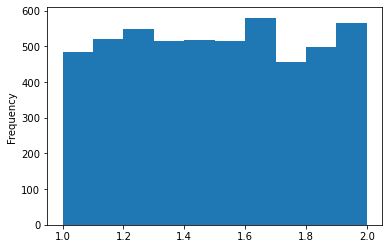

In [23]:
# lets look at the crunch factor with a histogram

cookies['crunch factor'].plot.hist()

# its quite uniform

### mixins

In [24]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5197 non-null   float64
 1   sugar index           5192 non-null   float64
 2   bake temp             5197 non-null   int64  
 3   chill time            5197 non-null   float64
 4   calories              5197 non-null   float64
 5   density               5197 non-null   float64
 6   pH                    5197 non-null   float64
 7   grams baking soda     5197 non-null   float64
 8   bake time             5187 non-null   float64
 9   quality               5197 non-null   int64  
 10  butter type           5197 non-null   object 
 11  weight                5197 non-null   float64
 12  diameter              5197 non-null   int64  
 13  mixins                5195 non-null   object 
 14  crunch factor         5197 non-null   float64
 15  aesthetic appeal     

In [25]:
# lets find out what is in mixins

cookies['mixins']

# ok like what you add as a special thing in the cookie
# there can be no mixins, just 1 or several

0                     raisins
1                     raisins
2             nuts, chocolate
3                   chocolate
4       nuts, oats, chocolate
                ...          
5193            peanut butter
5194                  raisins
5195          chocolate, oats
5196                chocolate
5197                chocolate
Name: mixins, Length: 5197, dtype: object

In [26]:
# lets look at the unique values

cookies['mixins'].unique()

array(['raisins', 'nuts, chocolate', 'chocolate', 'nuts, oats, chocolate',
       'chocolate, oats', 'raisins, oats', 'nuts,raisins', 'nuts, oats',
       'chocolate, peanut butter', 'chocolate, oats, peanut butter',
       'peanut butter', nan, 'peanut butter, raisins', 'oats'],
      dtype=object)

In [27]:
cookies['mixins'].nunique()

# there are 13 options on mixins for all cookies

13

## Wrangling the data / making small changes 

In [28]:
# dropping features appeal and diameter as decided from EDA

cookies.drop(columns=["aesthetic appeal", "diameter"], inplace=True)

C:\Users\digit\anaconda3\envs\excondables\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
# dropping the cookies, which dont have a mixin

cookies=cookies.dropna(subset=['mixins'])

In [30]:
# resetting the index after dropping rows

cookies.reset_index(drop=True, inplace=True)

In [31]:
# we want to split up the mixin column into individual columns
# therefore we create new columns per mixin

cookies['chocolate'] = 0
cookies['raisins'] = 0
cookies['oats'] = 0
cookies['nuts'] = 0
cookies['peanut butter'] = 0

In [32]:
# lets see if that worked

cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,mixins,crunch factor,chocolate,raisins,oats,nuts,peanut butter
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,raisins,1.30,0,0,0,0,0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,raisins,1.71,0,0,0,0,0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,"nuts, chocolate",1.78,0,0,0,0,0
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,chocolate,1.59,0,0,0,0,0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,"nuts, oats, chocolate",1.30,0,0,0,0,0


In [33]:
# now lets fill the new features with the values from the mixin column

mixins = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter']
for mix in mixins:
    for i in range(len(cookies)):
        if mix in [x.strip() for x in cookies.loc[i, 'mixins'].split(',')]:
            cookies.loc[i, mix] = 1

In [34]:
# now we can drop the mixins column

cookies.drop(columns=["mixins"], inplace=True)

In [ ]:
# did that work?

cookies.head()

<ipython-input-35-6438a521cb5f>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cookies.corr(), dtype=np.bool))


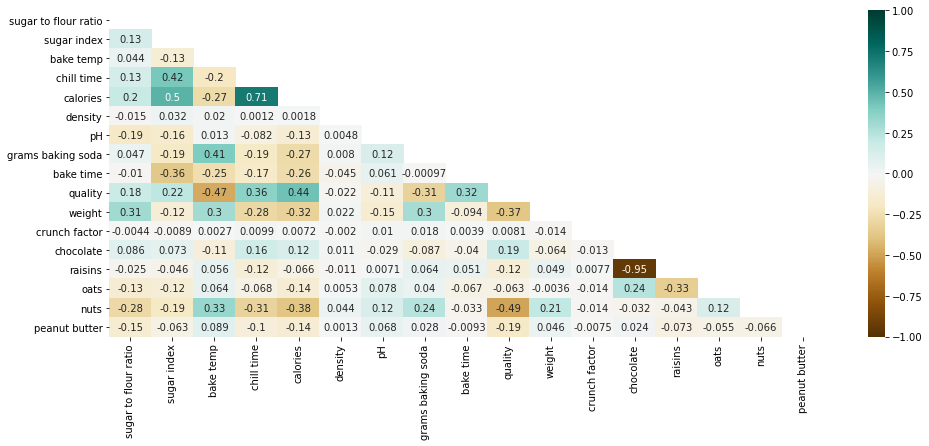

In [35]:
# we are looking at the heatmap again

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(cookies.corr(), dtype=np.bool))
heatmap = sns.heatmap(cookies.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

## pre processing- drop NANs and deal with non numerical data


In [36]:
# lets look again at which data types we have

cookies.dtypes

# only 1 feature left, which is cat - butter type

sugar to flour ratio    float64
sugar index             float64
bake temp                 int64
chill time              float64
calories                float64
density                 float64
pH                      float64
grams baking soda       float64
bake time               float64
quality                   int64
butter type              object
weight                  float64
crunch factor           float64
chocolate                 int64
raisins                   int64
oats                      int64
nuts                      int64
peanut butter             int64
dtype: object

In [37]:
# we will encode butter type as a pre processing step with get dummies

cookies=pd.get_dummies(cookies, columns=['butter type'])

In [38]:
# lets see if it did the trick

cookies.info()

# yes worked, now we have no more object type and butter is split into 2 new columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5195 entries, 0 to 5194
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5195 non-null   float64
 1   sugar index           5190 non-null   float64
 2   bake temp             5195 non-null   int64  
 3   chill time            5195 non-null   float64
 4   calories              5195 non-null   float64
 5   density               5195 non-null   float64
 6   pH                    5195 non-null   float64
 7   grams baking soda     5195 non-null   float64
 8   bake time             5185 non-null   float64
 9   quality               5195 non-null   int64  
 10  weight                5195 non-null   float64
 11  crunch factor         5195 non-null   float64
 12  chocolate             5195 non-null   int64  
 13  raisins               5195 non-null   int64  
 14  oats                  5195 non-null   int64  
 15  nuts                 

In [39]:
# now lets drop the na values

cookies = cookies.dropna()

In [40]:
# and reset the index again

cookies.reset_index(drop=True, inplace=True)

### Split data into dependent and independent variables 

In [41]:
X= cookies.drop(columns="quality")
y= cookies.quality

### Preprocessing - scaling 

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

### Train test split

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=40)

## get model, fit, make predictions  AND evaluate

In [45]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [47]:
predictions  = lm.predict(X_test)

In [48]:
predictions

array([7.85955773, 7.78956659, 7.98252519, 7.61128579, 7.36178717,
       7.54502501, 6.33214   , 6.23430087, 8.00312181, 8.6064535 ,
       8.14737223, 7.59694154, 8.03844853, 8.25684547, 7.54388023,
       7.74818278, 7.6082078 , 8.5726329 , 8.04329131, 5.54333526,
       7.65223866, 7.87802726, 7.49837684, 7.30988508, 8.51642314,
       7.00376252, 5.61936006, 6.73293539, 8.42115147, 7.02708039,
       5.64828333, 5.86164248, 8.23134199, 7.15800364, 6.44470682,
       7.41955061, 5.60871621, 8.14200188, 8.3466423 , 8.26586848,
       8.04775379, 5.28466446, 7.74830751, 6.05055067, 8.04242671,
       7.56844242, 7.91187352, 7.40697579, 7.74533041, 8.02584654,
       7.52759494, 5.27634243, 8.01665815, 8.55351996, 6.1113614 ,
       7.85387358, 7.82379942, 8.31946895, 8.58260152, 6.20402202,
       7.57943484, 7.26450163, 7.63355667, 7.64804155, 8.4953916 ,
       7.96242537, 8.19309694, 7.67629647, 7.70665906, 6.85083254,
       7.25042473, 7.5194031 , 7.38813166, 8.10402125, 5.48811

In [49]:
r2_score(y_test, predictions)

0.6535182023315391

In [50]:
mse = mean_squared_error(y_test, predictions)
print(mse)

0.5849814772698558


In [51]:
import math 
rmse = math.sqrt(mse)
print(rmse)

0.7648408182555739


## Make predictions on the cookies_validate dataset (without labels)

In [52]:
cookies_val = pd.read_csv('cookies_validate.csv')

In [53]:
cookies_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    779 non-null    int64  
 1   sugar to flour ratio  779 non-null    float64
 2   sugar index           779 non-null    float64
 3   bake temp             779 non-null    float64
 4   chill time            779 non-null    float64
 5   calories              779 non-null    float64
 6   density               779 non-null    float64
 7   pH                    779 non-null    float64
 8   grams baking soda     779 non-null    float64
 9   bake time             779 non-null    float64
 10  quality               779 non-null    int64  
 11  butter type           779 non-null    object 
 12  weight                779 non-null    float64
 13  diameter              779 non-null    int64  
 14  mixins                779 non-null    object 
 15  crunch factor         7

In [54]:
# need to clean the df as we did with the origial one on which we trained the model

cookies_val.drop(columns=["aesthetic appeal", "diameter"], inplace=True)

In [55]:
cookies_val['chocolate'] = 0
cookies_val['raisins'] = 0
cookies_val['oats'] = 0
cookies_val['nuts'] = 0
cookies_val['peanut butter'] = 0

In [56]:
mixins = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter']
for mix in mixins:
    for i in range(len(cookies_val)):
        if mix in [x.strip() for x in cookies_val.loc[i, 'mixins'].split(',')]:
            cookies_val.loc[i, mix] = 1
            
cookies_val.drop(columns=["mixins"], inplace=True)

In [57]:
cookies_val.drop(columns= 'id', inplace=True)

In [58]:
cookies_val=pd.get_dummies(cookies_val, columns=['butter type'])

In [59]:
cookies_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  779 non-null    float64
 1   sugar index           779 non-null    float64
 2   bake temp             779 non-null    float64
 3   chill time            779 non-null    float64
 4   calories              779 non-null    float64
 5   density               779 non-null    float64
 6   pH                    779 non-null    float64
 7   grams baking soda     779 non-null    float64
 8   bake time             779 non-null    float64
 9   quality               779 non-null    int64  
 10  weight                779 non-null    float64
 11  crunch factor         779 non-null    float64
 12  chocolate             779 non-null    int64  
 13  raisins               779 non-null    int64  
 14  oats                  779 non-null    int64  
 15  nuts                  7

In [60]:
X_val = cookies_val.drop(columns="quality")

In [61]:
X_val_scaled = scaler.fit_transform(X_val)

In [62]:
predictions_val=lm.predict(X_val_scaled)

In [63]:
predictions_val

array([7.41523042, 7.29541654, 7.47838538, 7.74235911, 7.19688958,
       7.15898889, 7.49356193, 7.08389191, 7.67452282, 7.28406796,
       7.42255623, 7.32937036, 7.42570801, 7.64591073, 7.92257388,
       7.15568306, 7.50538996, 7.1147322 , 8.25055228, 7.94110225,
       7.57823066, 7.55607626, 8.01892276, 7.66365322, 6.8917098 ,
       6.88558796, 6.99329051, 7.43646447, 6.85943826, 7.25359338,
       7.59326827, 7.85170084, 7.37059276, 7.44850281, 7.75840237,
       7.84297843, 7.84324395, 7.71989267, 7.10022992, 7.40465341,
       7.91205759, 7.66362239, 7.46945478, 7.11959429, 7.44476967,
       7.28127604, 7.14877533, 7.84336364, 7.53242254, 7.1386063 ,
       7.06515945, 7.01352146, 7.35049255, 7.13717287, 7.01953158,
       7.95145013, 7.25851367, 7.34572008, 7.91174654, 8.00622956,
       7.1080057 , 7.47613957, 6.73810273, 7.59034982, 7.4755433 ,
       7.34593141, 7.46736813, 7.25177477, 7.01535449, 8.17644367,
       7.84077524, 8.19368435, 7.15922531, 6.8253976 , 7.71632

## assess predictions against the test data (with labels)

In [64]:
cookies_test = pd.read_csv('cookies_test.csv')

In [65]:
y_real = cookies_test["quality"]

In [66]:
y_real.describe()

count    779.000000
mean       7.661104
std        1.093643
min        4.000000
25%        7.000000
50%        8.000000
75%        8.000000
max       10.000000
Name: quality, dtype: float64

In [67]:
mean_squared_error(y_real, predictions_val, squared = False)

# I guess this is better then the 41 from before

0.9025141041869351

## Can we get more accuracy with an ensemble method?

#### Task 4 : Add a random forest regressor model to try to get a more accurate score. 

You can follow https://www.geeksforgeeks.org/random-forest-regression-in-python/
or the sklearn_documentation https://scikit-learn.org/stable/search.html?q=random+forest
to import the regressor and fit it to your data, before running the cells below which will calculate your new RMSE accuracy score

In [68]:
# 1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
# 2 import data set - we already did

# 3 define x and y - we already did

# 4 train test split - we already did

In [71]:
# 5 Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [72]:
# 6 predictions on test data set with rf model

predictions_rf_test = regressor.predict(X_test)
predictions_rf_test

array([ 7.96,  8.04,  7.85,  8.66,  7.25,  7.4 ,  6.27,  6.41,  7.78,
        8.07,  8.78,  7.5 ,  7.76,  8.23, 10.  ,  7.79,  7.21,  8.49,
        8.45,  5.44,  7.9 ,  7.71,  8.75,  7.25,  8.76,  7.17,  5.36,
        7.52,  8.62,  7.04,  5.97,  6.08,  8.47,  7.24,  6.6 ,  8.55,
        5.92,  7.89,  8.35,  8.47,  8.16,  5.08,  7.7 ,  5.55,  7.84,
        7.47,  8.02,  7.27,  7.42,  8.36, 10.  ,  5.36,  7.99,  8.36,
        6.23,  7.32,  8.13,  8.16,  7.99,  6.46,  7.87,  7.37,  7.75,
        6.73,  8.14,  8.05,  8.43,  7.9 ,  7.42,  7.26,  7.1 ,  7.19,
        7.57,  7.91,  5.61,  7.94,  6.08,  7.32,  8.43,  7.85,  8.26,
        8.76,  7.39,  7.35,  7.95,  7.8 ,  8.34,  7.58,  8.57,  6.76,
        4.68,  7.71,  6.78,  7.39,  8.62,  5.44,  6.61,  7.52,  7.72,
        7.57,  5.41,  4.97,  7.84,  8.44,  7.48,  6.59,  7.98,  7.22,
        7.06,  8.17,  8.05,  5.19,  7.48,  7.89,  7.89,  7.91,  5.77,
        8.26,  7.47,  5.06,  5.07,  7.37,  8.35,  7.6 ,  7.55,  8.6 ,
        8.7 ,  7.84,

In [73]:
# comparing real values with predict values

df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':predictions_rf_test})
df

,Real Values,Predicted Values
220,8,7.96
3108,8,8.04
1666,8,7.85
314,9,8.66
4622,8,7.25
...,...,...
2134,7,7.14
2249,6,5.42
2220,9,8.91
550,6,5.32


From the above values, we infer that the model is able to predict the values of the y_test with a good accuracy though it can be improved by tuning the hyper-parameters such as n_estimators and max_depth. Play with those parameters in further iterations and improve the accuracy of the Random Forest Regression Model.

https://towardsdatascience.com/machine-learning-basics-random-forest-regression-be3e1e3bb91a

In [76]:
# 7 visualising result

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, predictions_rf_test, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [75]:
# 7 visualising result

# arange for creating a range of values
# from min value of x to max 
# value of x with a difference of 0.01 
# between two consecutive values
X_grid = np.arange(min(predictions_rf), max(predictions_rf), 0.01) 
  
# reshape for reshaping the data into a len(X_grid)*1 array, 
# i.e. to make a column out of the X_grid value                  
X_grid = X_grid.reshape((len(X_grid), 1))
  
# Scatter plot for original data
plt.scatter(X_train,y_train, color = 'blue')  
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), 
         color = 'green') 
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

NameError: name 'predictions_rf' is not defined

## Evaluate random forest accuracy 

RMSE accuracy Score - depending on what you named your model and predictions this code may need to be adapted

ie if your model is called 'new model' and you have created a prediction from this model 'predictions_new' then edit the code block below as: 
    
    mean_squared_error(y_real, predictions_new, squared = False)
    

In [78]:
# predictions on validation data set with rf model

predictions_rf_val = regressor.predict(X_val_scaled)
predictions_rf_val

array([7.3 , 8.06, 7.44, 7.99, 7.78, 7.55, 8.19, 7.3 , 7.72, 7.83, 7.25,
       7.73, 7.4 , 8.  , 8.27, 7.34, 8.41, 7.66, 7.55, 8.35, 7.81, 8.09,
       8.57, 7.38, 7.59, 7.14, 7.43, 7.43, 7.04, 7.34, 7.67, 7.85, 7.4 ,
       7.95, 8.42, 8.32, 8.65, 8.27, 6.89, 7.79, 8.36, 7.35, 7.83, 7.45,
       7.64, 7.37, 7.32, 8.04, 7.64, 7.92, 6.68, 7.63, 7.78, 8.  , 7.76,
       8.19, 7.65, 7.41, 8.2 , 8.54, 7.52, 7.67, 7.12, 8.39, 8.11, 7.78,
       7.13, 7.72, 7.45, 8.33, 7.89, 8.18, 6.91, 7.13, 8.06, 6.81, 7.7 ,
       7.79, 7.49, 7.88, 8.  , 7.93, 7.53, 7.8 , 7.09, 8.14, 8.14, 7.59,
       7.99, 8.59, 8.08, 7.4 , 7.84, 7.72, 8.07, 8.11, 7.69, 8.25, 7.74,
       7.13, 8.51, 7.71, 8.72, 7.98, 8.39, 7.52, 7.25, 7.33, 7.97, 8.28,
       7.84, 7.32, 7.51, 7.58, 7.38, 7.44, 7.73, 7.69, 8.72, 7.33, 7.9 ,
       7.86, 7.12, 7.37, 7.88, 7.77, 7.56, 7.81, 7.38, 8.16, 7.57, 8.09,
       7.32, 7.08, 7.47, 8.78, 7.38, 7.79, 7.46, 7.51, 7.63, 7.53, 7.55,
       7.62, 7.55, 7.39, 7.23, 9.07, 8.46, 8.62, 7.

In [79]:
#EDIT as appropriate to get your RMSE 

mean_squared_error(y_real, predictions_val, squared = False)

0.9025141041869351

## Trying a solo decision tree

In [81]:
# 1 importing libraries - already done
# 2 importing data - already done
# 3 train test split - already done

In [82]:
# 4 train decision tree regression model

# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [83]:
# 5 prediction result of decision tree model on test cookies

predictions_dt_test = regressor.predict(X_test)

In [84]:
# 6 comparing real and predict values

df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':predictions_dt_test})
df

# looks less accurate then the results we had frm the random forrest model
# which makes sense

,Real Values,Predicted Values
220,8,9.0
3108,8,8.0
1666,8,8.0
314,9,9.0
4622,8,8.0
...,...,...
2134,7,5.0
2249,6,6.0
2220,9,9.0
550,6,5.0


In [85]:
# predictions on validation data set with dt model

predictions_dt_val = regressor.predict(X_val_scaled)
predictions_dt_val

array([ 7.,  8.,  7.,  7.,  7.,  8.,  9.,  9.,  9.,  9.,  8.,  7.,  8.,
        8.,  9.,  8.,  9.,  7.,  6.,  6.,  8.,  9.,  7.,  7.,  9.,  9.,
        8.,  7.,  8.,  7.,  5.,  8.,  7.,  6.,  7.,  9.,  9.,  8.,  7.,
        8.,  8.,  9.,  7.,  8.,  8.,  7.,  7.,  8.,  7.,  9.,  5.,  8.,
        8.,  9.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  7.,  8.,  8.,  9.,
        8.,  7.,  7.,  8.,  8.,  8.,  7.,  7.,  7.,  8.,  7.,  8.,  7.,
        8.,  9.,  9.,  7.,  7.,  8.,  9.,  9.,  9.,  8.,  9.,  9.,  8.,
        8.,  8.,  9.,  8.,  8.,  7.,  9.,  8.,  8., 10.,  8.,  9.,  7.,
       10.,  9.,  8.,  7.,  8.,  9.,  7.,  8.,  7.,  8.,  7.,  8.,  8.,
        8.,  8.,  8.,  7.,  8.,  6.,  7.,  8.,  7.,  8.,  8.,  6.,  8.,
        7.,  8., 10.,  7.,  8.,  8.,  8.,  7.,  7.,  7.,  7.,  7.,  8.,
        8.,  8.,  8.,  8.,  8.,  9., 11.,  8.,  8.,  7.,  7.,  7.,  7.,
        8.,  9., 11., 10.,  9.,  8.,  6.,  9.,  8.,  9.,  8.,  7.,  7.,
        8.,  9.,  7.,  8.,  7.,  7.,  7.,  9.,  8.,  8., 10.,  8

In [86]:
mean_squared_error(y_real, predictions_dt_val, squared = False)

# this is higher then the result of the rf model, which makes sense
# but it is also lower then the result from the linear regression
# so its: linear regression, decision tree, random forrest

1.166498551369267